<a href="https://colab.research.google.com/github/karthikprasannamuralidharan/Scm/blob/master/ckdPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


dataset_name = 'chronic_kidney_disease.csv'

try:
    #import and load weather dataset into pandas dataframe
    ckd_df = pd.read_csv(dataset_name)
    
    #Description of Datasets
    #Print number of records and attributes of whole kidney dataset
    print('Shape of dataset: ' + str(ckd_df.shape))
    print('Total number of records in dataset = ' + str(ckd_df.shape[0]))
    print('Total number of attributes in dataset = ' + str(ckd_df.shape[1]))
    print('')
    
    
    ckd_df = ckd_df.replace('?', np.nan)
    
    #set the features and the target variables
    target_class = ckd_df['class']
    
    feature_classes = ckd_df.iloc[:, 0:24]
    
    
    #KNN imputation (n_neighbour = 5 means that the missing values will be replaced by the mean value of 5 nearest neighbors)
    knn_missing_values_imputer = KNNImputer(n_neighbors=10)
    feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)
    
    
    
    #Scaling and normalization of features
    standard_feature_scaler = StandardScaler()
    feature_classes = standard_feature_scaler.fit_transform(feature_classes)
    feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
    
    #Encoding target class using label encoding
    target_label_encoder = preprocessing.LabelEncoder()
    target_class = target_label_encoder.fit_transform(target_class)
    target_class1 = pd.DataFrame(target_class, columns=['class'])
    print(target_class1)
    
    #split the dataset into training and testing data
    train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.7, test_size = 0.3, random_state = 42)
    print('\nAfter Pre-processing:')
    print('Size of train dataset: ' + str(train_target.shape[0]))
    print('Size of test dataset: ' + str(test_target.shape[0]))
                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

     class
0        0
1        0
2        0
3        0
4        0
..     ...
395      1
396      1
397      1
398      1
399      1

[400 rows x 1 columns]

After Pre-processing:
Size of train dataset: 280
Size of test dataset: 120


The best parameters are:
 {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}

The best model after gridsearch is:
 SVC(C=0.1, kernel='linear', random_state=0)

Precision: 1.0
Accuracy: 0.9916666666666667
Recall: 0.9772727272727273
F1-score: 0.9885057471264368

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.98      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120


Confusion Matrix: 
[[76  0]
 [ 1 43]]


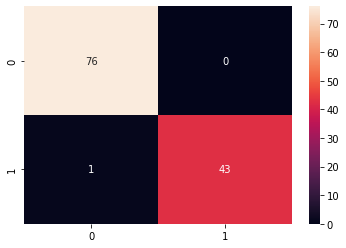

In [50]:
#Support vector machine

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#initialise the Support Vector Model
support_vector_machine_model = SVC(random_state = 0)

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': ['scale', 'auto'], 
                   'shrinking': [True, False]}


svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')

svm_grid_search.fit(train_features, train_target)


print('The best parameters are:\n ' +str(svm_grid_search.best_params_))


print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))

#svm predictions on test features
svm_prediction = svm_grid_search.predict(test_features)


print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))


print('\nClassification Report:\n' + str(metrics.classification_report(test_target, svm_prediction)))


print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, svm_prediction)))
sns.heatmap(metrics.confusion_matrix(test_target, svm_prediction), annot = True)
plt.show()

The best parameters are:
 {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 2, 'weights': 'uniform'}

The best model after gridsearch is:
 KNeighborsClassifier(n_jobs=1, n_neighbors=2)

Precision: 0.9318181818181818
Accuracy: 0.95
Recall: 0.9318181818181818
F1-score: 0.9318181818181818

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        76
           1       0.93      0.93      0.93        44

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120


Confusion Matrix: 
[[73  3]
 [ 3 41]]


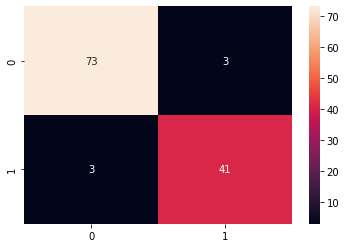

In [51]:
#K-Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier

#initialise the k nearest neighbour Model
k_nearest_neighbour_model = KNeighborsClassifier()

#defining the knn parameters for grid search
knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                       'weights': ['uniform', 'distance'], 
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
                       'n_jobs':[1, -1]}


knn_grid_search = GridSearchCV(k_nearest_neighbour_model, knn_parameters_grid, scoring = 'accuracy')

knn_grid_search.fit(train_features, train_target)


print('The best parameters are:\n ' +str(knn_grid_search.best_params_))


print('\nThe best model after gridsearch is:\n ' + str(knn_grid_search.best_estimator_))

#KNN predictions on test features
knn_prediction = knn_grid_search.predict(test_features)

#Performance Measure
print('\nPrecision: ' + str(metrics.precision_score(test_target, knn_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, knn_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, knn_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, knn_prediction)))


print('\nClassification Report:\n' + str(metrics.classification_report(test_target, knn_prediction)))


print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, knn_prediction)))
sns.heatmap(metrics.confusion_matrix(test_target, knn_prediction), annot = True)
plt.show()

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'splitter': 'random'}

The best model after gridsearch is:
 DecisionTreeClassifier(max_features='auto', random_state=0, splitter='random')

Precision: 0.9555555555555556
Accuracy: 0.975
Recall: 0.9772727272727273
F1-score: 0.9662921348314608

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.96      0.98      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120


Confusion Matrix: 
[[74  2]
 [ 1 43]]


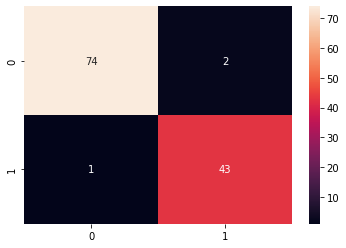

In [52]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier

#initialise the decision tree Model
decision_tree_model = DecisionTreeClassifier(random_state = 0)

#defining the decision tree parameters for grid search
dt_parameters_grid = {'criterion': ['gini', 'entropy'], 
                      'splitter': ['best', 'random'], 
                      'min_samples_leaf': [1, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}


dt_grid_search = GridSearchCV(decision_tree_model, dt_parameters_grid, scoring = 'accuracy')

dt_grid_search.fit(train_features, train_target)


print('The best parameters are:\n ' +str(dt_grid_search.best_params_))


print('\nThe best model after gridsearch is:\n ' + str(dt_grid_search.best_estimator_))

#Decision Tree predictions on test features
dt_prediction = dt_grid_search.predict(test_features)

#Performance Measure
print('\nPrecision: ' + str(metrics.precision_score(test_target, dt_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, dt_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, dt_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, dt_prediction)))


print('\nClassification Report:\n' + str(metrics.classification_report(test_target, dt_prediction)))


print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, dt_prediction)))
sns.heatmap(metrics.confusion_matrix(test_target, dt_prediction), annot = True)
plt.show()

| Classification Algorithm | Accuracy (%) | Recall (%)| Precision (%) | F1-score (%)|
|---|---|---|---|---|
|Support Vector Machine|99.16|97.72|100|98.85|
|K Nearest Neighbour   |95|93.18|93.18|93.18|
|Decision Tree         |97.5|97.72|95.55|96.62|